In [47]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [ ]:


print("✅ Libraries Imported Successfully!")


file_path = 'sensorData.csv'  # <-- Change path if needed

# Load the data
df = pd.read_csv(file_path)

print("✅ Dataset Loaded Successfully!")
print(df.head())


print("\n🔎 Dataset Info:")
print(df.info())


✅ Libraries Imported Successfully!
✅ Dataset Loaded Successfully!
                        _id  temperature  humidity  air_quality  noise_level  \
0  680cb11a2a8a477d1c78c751         33.1      73.8           89            3   
1  680cb1572a8a477d1c78c752         33.2      73.7          101            2   
2  680cb1952a8a477d1c78c753         33.2      73.7           65           28   
3  680cb1d22a8a477d1c78c754         33.2      73.7           94            3   
4  680cb2102a8a477d1c78c755         33.2      73.9           95            9   

                  timestamp        zone           local_timestamp  
0  2025-04-26T10:10:34.078Z  playground                       NaN  
1  2025-04-26T10:11:35.697Z  playground                       NaN  
2  2025-04-26T10:12:37.143Z  playground                       NaN  
3  2025-04-26T10:13:38.812Z  playground                       NaN  
4  2025-04-26T10:14:40.468Z  playground  2025-04-26T15:44:40.468Z  

🔎 Dataset Info:
<class 'pandas.core.frame.Da

In [49]:

# Check for missing values
print("\n🧹 Missing Values:")
print(df.isnull().sum())




🧹 Missing Values:
_id                0
temperature        0
humidity           0
air_quality        0
noise_level        0
timestamp          0
zone               0
local_timestamp    4
dtype: int64


In [50]:

if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])


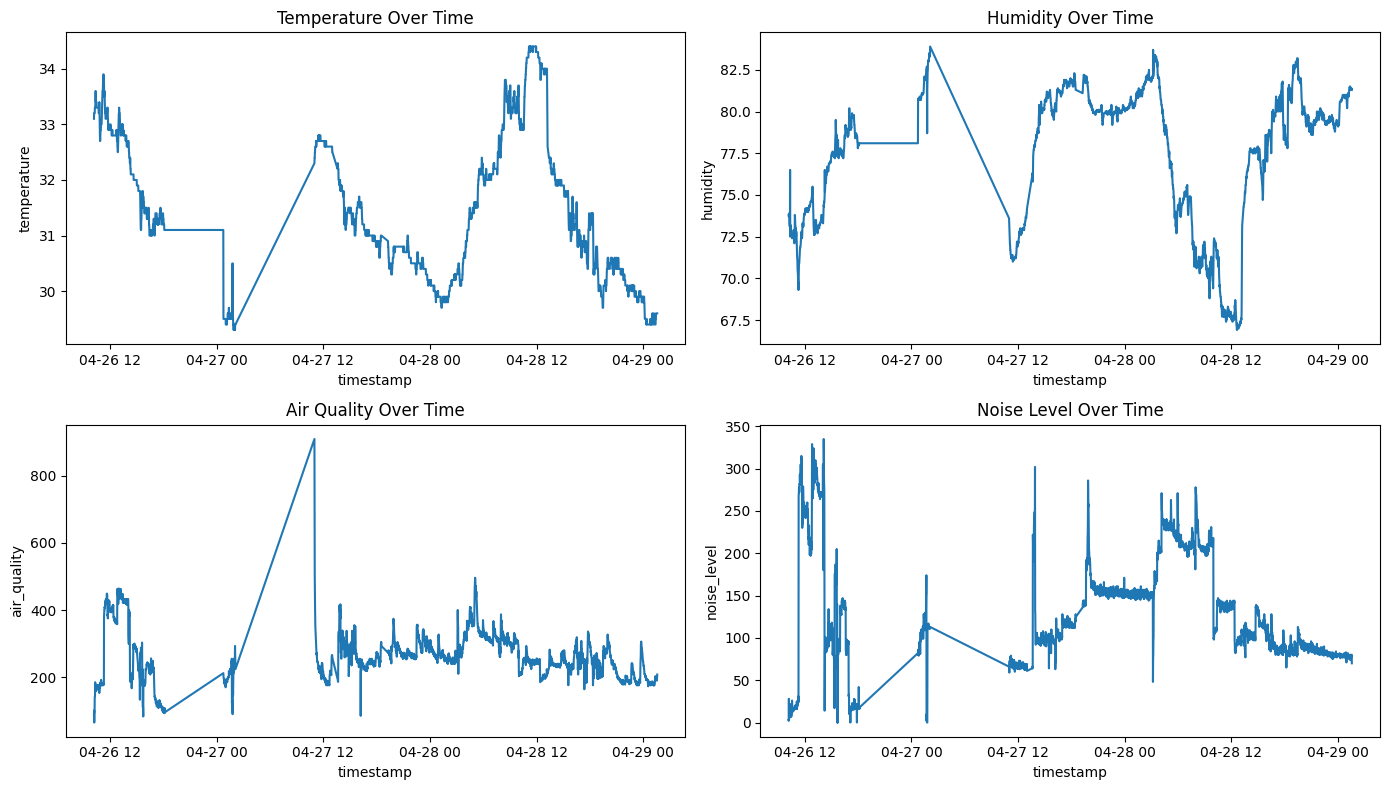

✅ Data Visualization Done!

✅ Selected Features for ML:
   temperature  humidity  air_quality  noise_level
0         33.1      73.8           89            3
1         33.2      73.7          101            2
2         33.2      73.7           65           28
3         33.2      73.7           94            3
4         33.2      73.9           95            9


In [51]:

# Plot the sensors
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

sns.lineplot(data=df, x='timestamp', y='temperature', ax=axes[0, 0]).set(title='Temperature Over Time')
sns.lineplot(data=df, x='timestamp', y='humidity', ax=axes[0, 1]).set(title='Humidity Over Time')
sns.lineplot(data=df, x='timestamp', y='air_quality', ax=axes[1, 0]).set(title='Air Quality Over Time')
sns.lineplot(data=df, x='timestamp', y='noise_level', ax=axes[1, 1]).set(title='Noise Level Over Time')

plt.tight_layout()
plt.show()

print("✅ Data Visualization Done!")


# Step 5: Feature Selection

selected_features = ['temperature', 'humidity', 'air_quality', 'noise_level']


df_selected = df[selected_features]

print("\n✅ Selected Features for ML:")
print(df_selected.head())



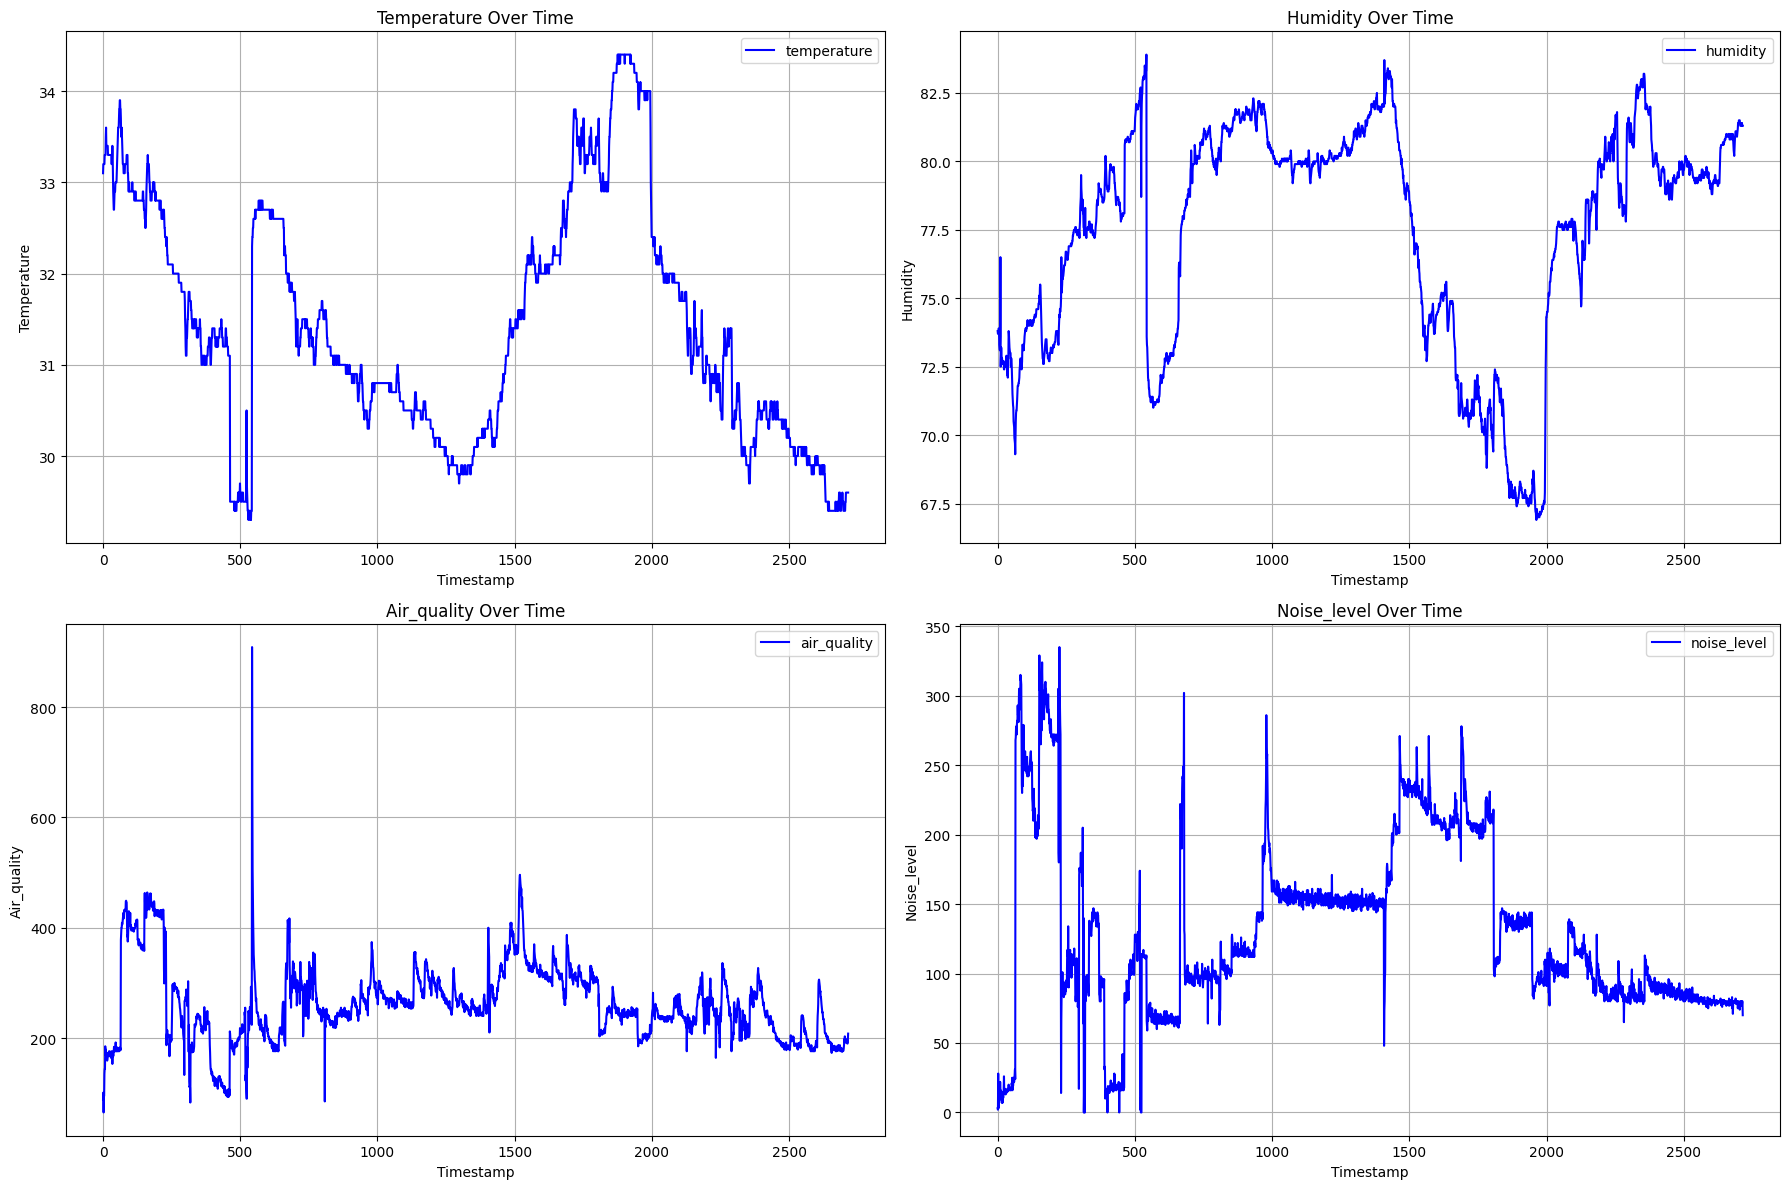

In [52]:
# --- Step 1: Temporal Analysis ---

import matplotlib.pyplot as plt

# Already selected these features
features = ['temperature', 'humidity', 'air_quality', 'noise_level']

# Plot each feature over time
plt.figure(figsize=(18, 12))

for idx, feature in enumerate(features):
    plt.subplot(2, 2, idx+1)
    plt.plot(df_selected.index, df_selected[feature], label=feature, color='b')
    plt.title(f"{feature.capitalize()} Over Time")
    plt.xlabel('Timestamp')
    plt.ylabel(feature.capitalize())
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


temporal analysis

🔗 Correlation Matrix:
             temperature  humidity  air_quality  noise_level
temperature     1.000000 -0.926549     0.225484     0.244201
humidity       -0.926549  1.000000    -0.157043    -0.228317
air_quality     0.225484 -0.157043     1.000000     0.833249
noise_level     0.244201 -0.228317     0.833249     1.000000


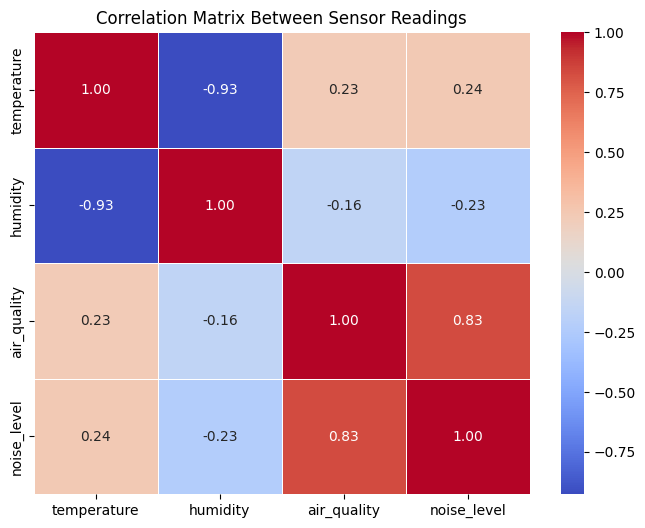

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate Correlation
correlation_matrix = df_selected[['temperature', 'humidity', 'air_quality', 'noise_level']].corr()

# Display the Correlation Matrix
print("🔗 Correlation Matrix:")
print(correlation_matrix)

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Between Sensor Readings')
plt.show()


corelation analysis

🔵 Detecting anomalies for temperature...
🔵 Detecting anomalies for humidity...
🔵 Detecting anomalies for air_quality...
🔵 Detecting anomalies for noise_level...


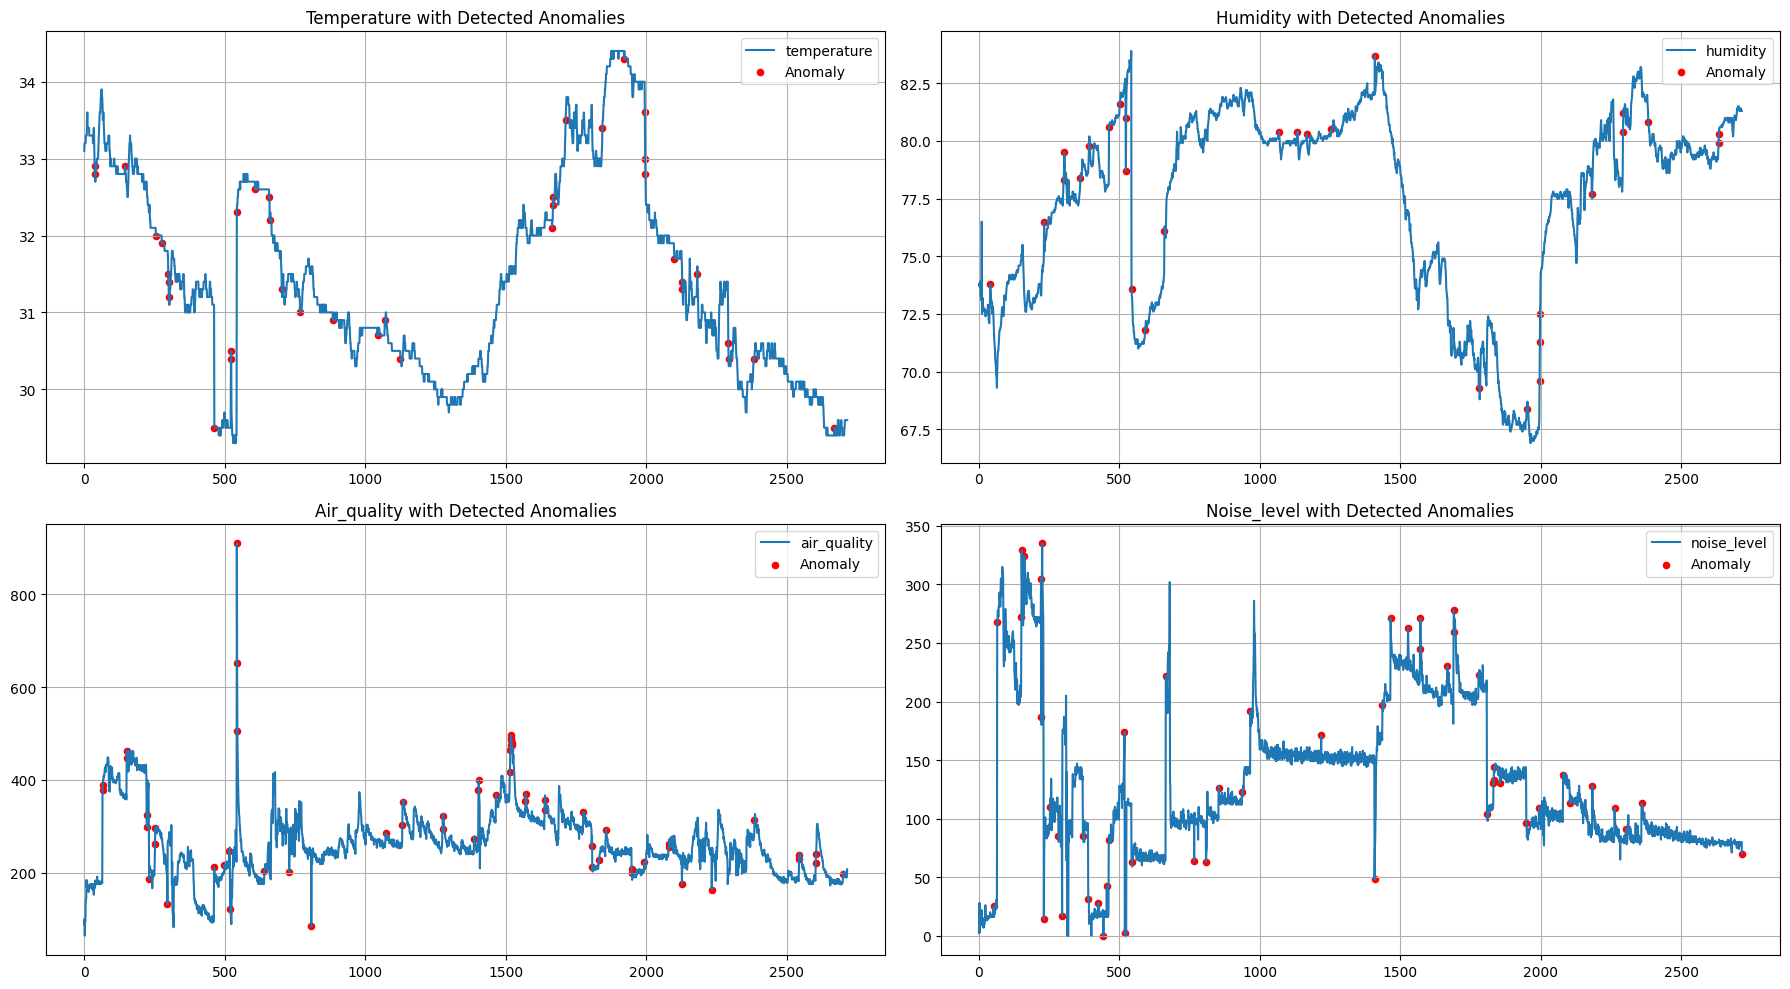

✅ Anomaly Detection Completed!
🔵 Total anomalies detected: 144 (saved to detected_anomalies.csv)


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Z-Score Based Detection ---
def detect_anomalies_zscore(df, feature, threshold=3):
    mean_val = df[feature].mean()
    std_val = df[feature].std()
    z_scores = (df[feature] - mean_val) / std_val
    anomalies = np.abs(z_scores) > threshold
    return anomalies

# --- Step 2: Moving Average Based Detection ---
def detect_anomalies_moving_avg(df, feature, window=20, threshold=3):
    rolling_mean = df[feature].rolling(window=window).mean()
    rolling_std = df[feature].rolling(window=window).std()
    upper_bound = rolling_mean + threshold * rolling_std
    lower_bound = rolling_mean - threshold * rolling_std
    anomalies = (df[feature] > upper_bound) | (df[feature] < lower_bound)
    return anomalies

# --- Step 3: Detect anomalies for all features ---
anomaly_results = {}

for feature in ['temperature', 'humidity', 'air_quality', 'noise_level']:
    print(f"🔵 Detecting anomalies for {feature}...")
    
    anomalies_z = detect_anomalies_zscore(df_selected, feature)
    anomalies_ma = detect_anomalies_moving_avg(df_selected, feature)
    
    anomalies_combined = anomalies_z | anomalies_ma
    anomaly_results[feature] = anomalies_combined

# --- Step 4: Plot anomalies ---
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
features = ['temperature', 'humidity', 'air_quality', 'noise_level']
axs = axs.ravel()

for idx, feature in enumerate(features):
    axs[idx].plot(df_selected.index, df_selected[feature], label=feature)
    axs[idx].scatter(df_selected.index[anomaly_results[feature]], df_selected[feature][anomaly_results[feature]], color='red', label='Anomaly', s=20)
    axs[idx].set_title(f"{feature.capitalize()} with Detected Anomalies")
    axs[idx].legend()
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

# --- Step 5: Save anomalies to CSV ---
anomalies_df = pd.DataFrame({feature: anomaly_results[feature] for feature in features})
anomalies_df = df_selected.join(anomalies_df, rsuffix='_anomaly')
anomalies_detected = anomalies_df[(anomalies_df['temperature_anomaly']) | 
                                  (anomalies_df['humidity_anomaly']) | 
                                  (anomalies_df['air_quality_anomaly']) | 
                                  (anomalies_df['noise_level_anomaly'])]

anomalies_detected.to_csv('detected_anomalies.csv', index=True)

print("✅ Anomaly Detection Completed!")
print(f"🔵 Total anomalies detected: {len(anomalies_detected)} (saved to detected_anomalies.csv)")


In [55]:
import pandas as pd

# Load detected anomalies
df_anomalies = pd.read_csv('detected_anomalies.csv')

# --- 1. Anomaly Count per Sensor ---
anomaly_counts = {
    'temperature': df_anomalies['temperature'].notna().sum(),
    'humidity': df_anomalies['humidity'].notna().sum(),
    'air_quality': df_anomalies['air_quality'].notna().sum(),
    'noise_level': df_anomalies['noise_level'].notna().sum()
}
anomaly_counts_df = pd.DataFrame(list(anomaly_counts.items()), columns=['Sensor', 'Anomaly_Count'])
print(anomaly_counts_df)

# --- 2. Min/Max Values of Anomalies ---
min_max_values = {
    'temperature_min': df_anomalies['temperature'].min(),
    'temperature_max': df_anomalies['temperature'].max(),
    'humidity_min': df_anomalies['humidity'].min(),
    'humidity_max': df_anomalies['humidity'].max(),
    'air_quality_min': df_anomalies['air_quality'].min(),
    'air_quality_max': df_anomalies['air_quality'].max(),
    'noise_level_min': df_anomalies['noise_level'].min(),
    'noise_level_max': df_anomalies['noise_level'].max()
}
min_max_df = pd.DataFrame(min_max_values.items(), columns=['Metric', 'Value'])
print(min_max_df)

# --- 3. Top 5 Critical Air Quality Spikes ---
top5_air_quality = df_anomalies.sort_values(by='air_quality', ascending=False).head(5)
top5_air_quality = top5_air_quality[['temperature', 'humidity', 'air_quality', 'noise_level']]
print(top5_air_quality)


        Sensor  Anomaly_Count
0  temperature            144
1     humidity            144
2  air_quality            144
3  noise_level            144
            Metric  Value
0  temperature_min   29.4
1  temperature_max   34.3
2     humidity_min   67.6
3     humidity_max   83.7
4  air_quality_min   85.0
5  air_quality_max  909.0
6  noise_level_min    0.0
7  noise_level_max  335.0
    temperature  humidity  air_quality  noise_level
42         32.3      73.6          909           66
43         32.4      73.3          652           63
44         32.4      73.2          505           59
83         31.5      76.6          496          232
82         31.6      76.6          491          234


In [56]:

#  Data Normalization 

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df_selected)

print("\n✅ Data Normalized:")
print(scaled_data[:5])

# 🛠 Step 7: Create Time-Series Sequences (for LSTM Input)

LOOKBACK = 300
FORECAST_STEPS = 144

X = []
y = []

for i in range(LOOKBACK, len(scaled_data) - FORECAST_STEPS + 1):
    X.append(scaled_data[i-LOOKBACK:i])
    y.append(scaled_data[i:i+FORECAST_STEPS, :])  # ✅ All 4 features (temperature, humidity, etc.)

X = np.array(X)
y = np.array(y)

print("✅ X shape:", X.shape)  # (samples, lookback, features)
print("✅ y shape:", y.shape)  # (samples, forecast_steps, features)






✅ Data Normalized:
[[0.74509804 0.40588235 0.02843602 0.00895522]
 [0.76470588 0.4        0.04265403 0.00597015]
 [0.76470588 0.4        0.         0.08358209]
 [0.76470588 0.4        0.03436019 0.00895522]
 [0.76470588 0.41176471 0.03554502 0.02686567]]
✅ X shape: (2273, 300, 4)
✅ y shape: (2273, 144, 4)


In [57]:
# Train-Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("✅ Train/Test Split Done!")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)





✅ Train/Test Split Done!
X_train: (1818, 300, 4) X_test: (455, 300, 4)
y_train: (1818, 144, 4) y_test: (455, 144, 4)


In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Build Model
model = Sequential()
model.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, activation='tanh'))
model.add(Dense(FORECAST_STEPS * len(features)))  # Predict 144 × 4 = 576 outputs

model.compile(optimizer='adam', loss='mse')

model.summary()


# Early Stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train.reshape(y_train.shape[0], -1),  # Flatten y
    epochs=80,
    batch_size=32,
    validation_data=(X_test, y_test.reshape(y_test.shape[0], -1)),
    callbacks=[early_stopping],
    verbose=1
)

print("✅ Model Training Completed!")



c:\Users\94772\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 300, 128)       │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 576)            │        37,440 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,944 (605.25 KB)

 Trainable params: 154,944 (605.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 0.1237 - val_loss: 0.0359
Epoch 2/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 226ms/step - loss: 0.0378 - val_loss: 0.0141
Epoch 3/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 278ms/step - loss: 0.0214 - val_loss: 0.0117
Epoch 4/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - loss: 0.0204 - val_loss: 0.0093
Epoch 5/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step - loss: 0.0169 - val_loss: 0.0104
Epoch 6/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - loss: 0.0134 - val_loss: 0.0105
Epoch 7/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - loss: 0.0141 - val_loss: 0.0127
Epoch 8/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - loss: 0.0106 - val_loss: 0.0062
Epoch 9/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 10/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - loss: 0.0090 - val_loss: 0.0122
Epoch 11/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 280ms/step - loss: 0.0151 - val_loss: 0.0092
Epoch 12/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 14

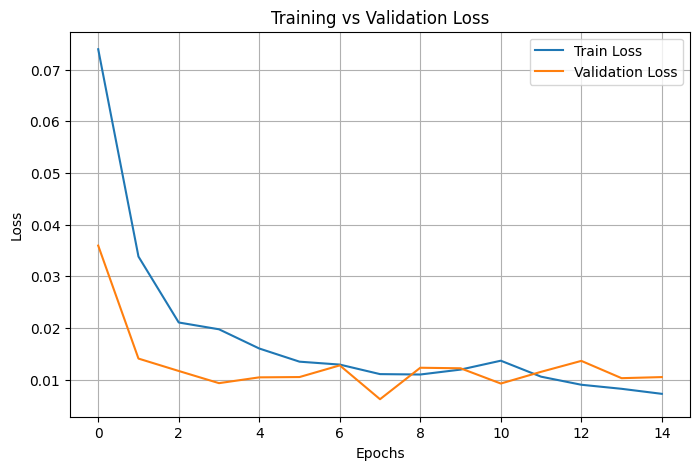

In [59]:
# Plot Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
# Predict
y_pred = model.predict(X_test)

# Reshape predictions back to (samples, forecast_steps, features)
y_pred = y_pred.reshape(y_pred.shape[0], FORECAST_STEPS, len(features))
y_test = y_test.reshape(y_test.shape[0], FORECAST_STEPS, len(features))

# Inverse transform predictions and ground truth
predictions_inverse = []
actual_inverse = []

for i in range(y_pred.shape[0]):
    inv_pred = scaler.inverse_transform(y_pred[i])
    inv_real = scaler.inverse_transform(y_test[i])
    predictions_inverse.append(inv_pred)
    actual_inverse.append(inv_real)

predictions_inverse = np.array(predictions_inverse)
actual_inverse = np.array(actual_inverse)

print("✅ Inverse Transformations Done!")


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
✅ Inverse Transformations Done!



✅ Evaluation Metrics for Temperature Forecast:
MSE: 0.3137
RMSE: 0.5601
MAE: 0.4610
R² Score: -0.4227


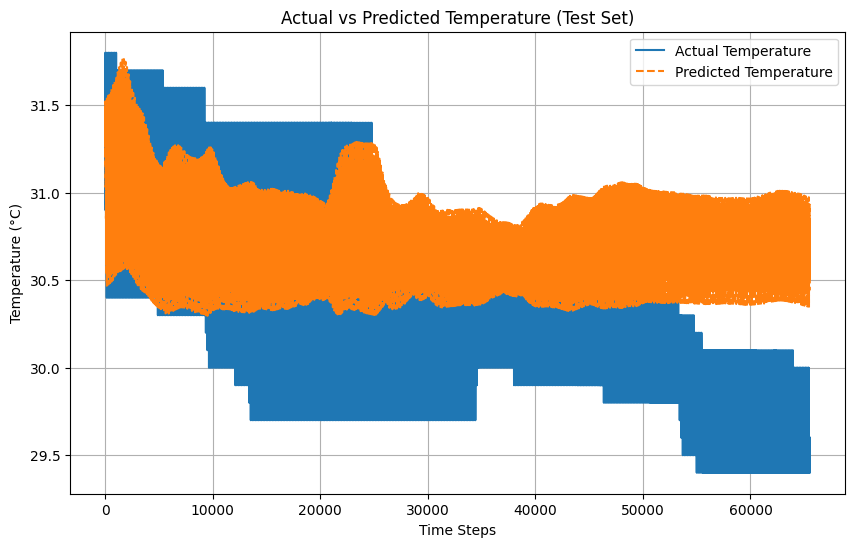

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Take only Temperature (first feature, index 0)
y_test_temp = actual_inverse[:,:,0].flatten()
y_pred_temp = predictions_inverse[:,:,0].flatten()

# Calculate Metrics
mse = mean_squared_error(y_test_temp, y_pred_temp)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_temp, y_pred_temp)
r2 = r2_score(y_test_temp, y_pred_temp)

print(f"\n✅ Evaluation Metrics for Temperature Forecast:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.plot(y_test_temp, label='Actual Temperature')
plt.plot(y_pred_temp, label='Predicted Temperature', linestyle='--')
plt.title('Actual vs Predicted Temperature (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()
